<a href="https://colab.research.google.com/github/rahiakela/math-for-programmers/blob/main/3-ascending-to-3d-world/2_vector_arithmetic_in_3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vector arithmetic in 3D

In the 2D plane, we worked with three interchangeable mental models of a vector:
coordinate pairs, arrows of fixed length and direction, and points positioned relative to the origin.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/2d-plane.png?raw=1' width='800'/>

We can interpret a 3D vector in similar ways. Instead of viewing a rectangular portion of the plane, we start with a finite box of 3D space. Such a
3D box, has a finite height, width, and depth. In 3D, we keep the notions of x and y directions, and we add a z direction with which to measure the depth.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/3d-plane.png?raw=1' width='800'/>

Arrows and points work as mental models for vectors in 3D just like in 2D, and we can measure them similarly with coordinates.



## Setup

In [ ]:
%%shell

wget https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/3-ascending-to-3d-world/vectors.py
wget https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/3-ascending-to-3d-world/colors.py
wget https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/3-ascending-to-3d-world/draw2d.py
wget https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/3-ascending-to-3d-world/draw3d.py

In [2]:
from draw3d import *
from vectors import *

%load_ext autoreload
%autoreload 2

## Adding 3D vectors

In 3D, vector addition can still be accomplished by adding coordinates. The vectors `(2, 1, 1)` and `(1, 2, 2)` sum to `(2 + 1, 1 + 2, 1 + 2) = (3, 3, 3)`. We can start at the origin and place the two input vectors tip-to-tail in either order to get to the sum point `(3, 3, 3)`.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/3d-vec-add.png?raw=1' width='800'/>

In [3]:
v1 = [2, 1, 1]
v2 = [1, 2, 2]
v3 = add(*(v1, v2))

In [4]:
v3

(3, 3, 3)

In [5]:
v1 = [1, 2, 2]
v2 = [2, 1, 1]
v3 = add(*(v1, v2))
v3

(3, 3, 3)

As in 2D, we can add any number of 3D vectors together by summing all of their
x-coordinates, all of their y-coordinates, and all of their z-coordinates. These three sums give us the coordinates of the new vector. 

For instance, in the sum `(1, 1, 3) + (2, 4, –4) + (4, 2, –2)`, the respective x-coordinates are 1, 2, and 4, which sum to 7. The y-coordinates sum to 7 as well, and the z-coordinates sum to –3; therefore, the vector sum is `(7, 7, –3)`.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/3d-vec-adding.png?raw=1' width='800'/>

In Python, we can write a concise function to sum any number of input vectors, and that works in two or three dimensions.

In [6]:
def add(*vectors):
  by_coordinate = zip(*vectors)
  coordinate_sums = [sum(coords) for coords in by_coordinate]

  return tuple(coordinate_sums)

Let’s break it down. Calling Python’s zip function on the input vectors extracts their x-coordinates, y-coordinates, and z-coordinates.

In [7]:
list(zip(*[(1,1,3),(2,4,-4),(4,2,-2)]))

[(1, 2, 4), (1, 4, 2), (3, -4, -2)]

If we apply Python’s sum function to each of the grouped coordinates, we get the sums of x, y, and z values, respectively:

In [8]:
[sum(coords) for coords in [(1,2,4),(1,4,2),(3,-4,-2)]]

[7, 7, -3]

Finally, for consistency, we convert this from a list to a tuple because we’ve represented all of our vectors as tuples to this point. The result is the tuple (7, 7, 3). We could also have written the add function as the following one-liner.

In [9]:
def add(*vectors):
  return tuple(map(sum, zip(*vectors)))

In [10]:
add(*[(1,1,3),(2,4,-4),(4,2,-2)])

(7, 7, -3)

##Scalar multiplication in 3D

To multiply a 3D vector by a scalar, we multiply all of its components by the scalar factor.

For example, the vector (1, 2, 3) multiplied by the scalar 2 gives us (2, 4, 6). This resulting vector is twice as long but points in the same direction as in the 2D case. Like v = (1, 2, 3) and its scalar multiple 2 · v = (2, 4, 6).

In [11]:
v1 = [1, 2, 3]
v2 = scale(2, v1)
v2

(2, 4, 6)

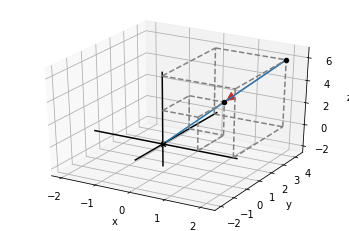

In [12]:
draw3d(
    Points3D((1, 2, 3), (2, 4, 6)),
    Arrow3D((1, 2, 3), (2, 4, 6)),
    Segment3D((0, 0, 0), (2, 4, 6)),
    Box3D(1, 2, 3),
    Box3D(2, 4, 6)
    )

## Subtracting 3D vectors

In 2D, the difference of the two vectors v – w is the vector “from w to v,” which is called the displacement. 

In 3D, the story is the same; in other words, `v – w` is the displacement from w to v, which is the vector you can add to w to get v.

Thinking of v and w as arrows from the origin, the difference `v – w` is an arrow that can be positioned to have its tip at the tip of v and its tail at the tip of w.

Let's calculate the difference of `v = (–1, –3, 3)` and `w = (3, 2, 4)`, both as an arrow from w to v and as a point in its own right.

In [13]:
v1 = [-1, -3, 3]
v2 = [3, 2, 4]
v3 = subtract(v1, v2)
v3

(-4, -5, -1)

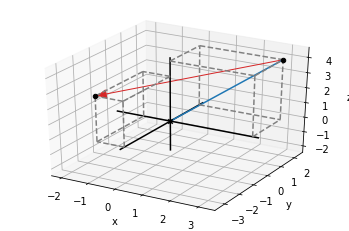

In [14]:
draw3d(
    Points3D((-1, -3, 3), (3, 2, 4)),
    Arrow3D((-1, -3, 3), (3, 2, 4)),
    Segment3D((0, 0, 0), (3, 2, 4)),
    Box3D(-1, -3, 3),
    Box3D(3, 2, 4)
    )

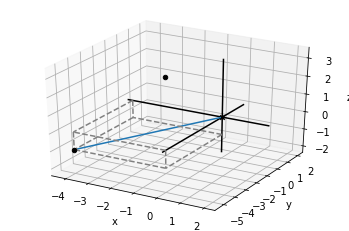

In [15]:
draw3d(
    Points3D((-1, -3, 3), (-4, -5, -1)),
    Segment3D((0, 0, 0), (-4, -5, -1)),
    Box3D(-4, -5, -1)
    )

## Computing lengths and distances

In 2D, we calculated the length of a vector with the Pythagorean theorem, using the fact that an arrow vector and its components make a right triangle. Likewise, the distance between two points in the plane was just the length of their difference as a vector.

Let’s try to find the length of the vector `(4, 3, 12)`. The x and y components still give us a right triangle lying in the plane where `z = 0`. This triangle’s hypotenuse, or diagonal side, has length $\sqrt{(4^2 + 3^2)} = \sqrt{25} = 5$. If this were a 2D vector, we’d be done, but the z component of 12 makes this vector quite a bit longer.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/3d-pythagorean.png?raw=1' width='800'/>

So far all of the vectors we’ve considered lie in the x,y plane where z = 0. The x component is (4, 0, 0), the y component is (0, 3, 0), and their vector sum is (4, 3, 0). The z component of (0, 0, 12) is perpendicular to all three of these. That’s useful because it gives us a second right triangle in the diagram: the one formed by (4, 3, 0) and (0, 0, 12) and placed tip-to-tail. The hypotenuse of this triangle is our original vector (4, 3, 12), whose length we want to find.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/3d-pythagorean2.png?raw=1' width='800'/>

Let’s focus on this second right triangle and invoke the Pythagorean theorem again to find the hypotenuse length.

Squaring both known sides and taking the square root should give us the length.

Here, the lengths are 5 and 12 so the result is $\sqrt{5^2 + 12^2} = 13$.

$$length = \sqrt{(\sqrt{x^2 + y ^2})^2 + z^2} = \sqrt{x^2 + y^2 + z^2}$$

This is conveniently similar to the 2D length formula. In either 2D or 3D, the length of a vector is the square root of the sum of squares of its components. Because we don’t explicitly reference the length of the input tuple anywhere in the following length function, it will work on either 2D or 3D vectors:


In [16]:
from math import sqrt

def length(v):
  return sqrt(sum([coord ** 2 for coord in v]))

In [17]:
l = length((4, 3, 12))
l

13.0

So, for instance, length((3,4,12)) returns 13.

## Computing angles and directions

As in 2D, you can think of a 3D vector as an arrow or a displacement of a certain length in a certain direction. In 2D, this means that two numbers—a length and an angle making a pair of polar coordinates—are sufficient to specify any 2D vector. **In 3D, one angle is not sufficient to specify a direction but two angles are.**

For the first angle, we again think of
the vector without its z-coordinate, as if
it still lived in the x,y plane. Another
way of thinking of this is as the shadow
cast by the vector from a light at a very
high z position. This shadow makes
some angle with the positive x-axis,
which is analogous to the angle we used
in polar coordinates, and we label it
with the Greek letter $\phi$ (phi). The second
angle is the one that the vector
makes with the z-axis, which is labeled
with the Greek letter $\theta$ (theta).

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/3d-angles.png?raw=1' width='800'/>

**The length of the vector, labeled r,
along with the angles $\phi$ and $\theta$ can
describe any vector in three dimensions.
Together, the three numbers $r, \phi,$ and $\theta$
are called spherical coordinates as opposed
to the Cartesian coordinates x, y, and z.**

**In three dimensions, neither of the angles $\phi$ and $\theta$ lets us immediately decide the angle between two vectors. And while we could rotate vectors easily around the z-axis by adding or subtracting from the angle  $\phi$, it’s not convenient to rotate about any other axis in spherical coordinates.**

**We need some more general tools to handle angles and trigonometry in 3D. We have two such tools, called vector products.**

## Exercises

**Ex-3.3**: Draw $(4,0,3)$ and $(-1,0,1)$ as Arrow3D objects, such that they are placed tip-to-tail in both orders in 3D. What is their vector sum?

We can find the vector sum using the add function.

In [20]:
add((4, 0, 3), (-1, 0, 1))

(3, 0, 4)

Then to draw these tip-to-tail, we draw arrows from the origin to each point and
from each point to the vector sum (3, 0, 4). Like the 2D Arrow object, Arrow3D
takes the tip vector of the arrow first and then, optionally, the tail vector if it is not the origin:

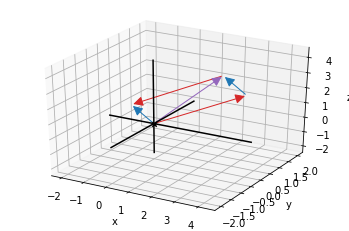

In [23]:
draw3d(
    Arrow3D((4, 0, 3), color=red),
    Arrow3D((-1, 0, 1), color=blue),
    Arrow3D((3, 0, 4), (4, 0, 3), color=blue),
    Arrow3D((-1, 0, 1), (3, 0, 4), color=red),
    Arrow3D((3, 0, 4), color=purple),
)

**Ex-3.5**: The following comprehension creates a list of 24
Python vectors:

```python
from math import sin, cos, pi

vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]
```

What is the sum of the 24 vectors? Draw all 24 of them tip-to-tail as Arrow3D
objects.

**Solution**

Drawing these vectors tip-to-tail ends up producing a helix shape:


(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


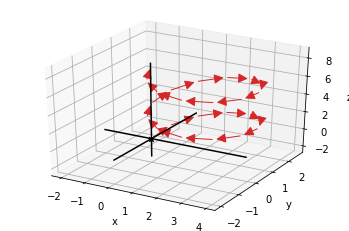

In [24]:
from math import sin, cos, pi

vs = [(sin(pi * t / 6), cos(pi * t / 6), 1.0 / 3) for t in range(0, 24)]

# Begins a running sum at (0, 0, 0), where the tip-to-tail addition starts
running_sum = (0, 0, 0)
arrows = []
for v in vs:
  next_sum = add(running_sum, v)
  arrows.append(Arrow3D(next_sum, running_sum))
  running_sum = next_sum
print(running_sum)
draw3d(*arrows)

which is approximately (0, 0, 8).

**Ex-3.6** Write a function scale(scalar,vector) that returns the input
scalar times the input vector. Specifically, write it so it works on 2D or 3D vectors, or vectors of any number of coordinates.

**Solution**

With a comprehension, we multiply each coordinate in the vector by
the scalar. This is a generator comprehension that is converted to a tuple:

In [25]:
def scale(scalar, v):
  return tuple(scalar * coord for coord in v)

**Ex-3.7**: Let u = (1, –1, –1) and v = (0, 0, 2). What is the result of
u + ½ · (v – u)?

In [27]:
u = [1, -1, -1]
v = [0, 0, 2]

u_v = subtract(v, u)
vs = scale(0.5, u_v)
add(u, vs)

(0.5, -0.5, 0.5)

The final desired result of u + ½ · (v – u) is then (½, –½, ½). Incidentally, this is the point exactly halfway between the point u and the point v.